In [234]:
%matplotlib inline
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [235]:
results = pd.read_csv("result.txt")

In [236]:
results.head()

,matrixDimension,timeInnerExact,errorInnerExact,timeOuterExact,errorOuterExact,timeOuterApprox,errorOuterApprox,subsample
0,1,0.011,0.0,0.010,0.0,0.108,0.000000,0.4
1,2,0.001,0.0,0.002,0.0,0.033,0.167940,0.4
2,3,0.001,0.0,0.002,0.0,0.021,0.158729,0.4
3,4,0.002,0.0,0.002,0.0,0.020,0.163529,0.4
4,5,0.001,0.0,0.002,0.0,0.020,0.224682,0.4


In [237]:
subsample = results.loc[2]["subsample"]

In [238]:
results = results.drop(results["errorOuterApprox"] > 10000, axis=0)

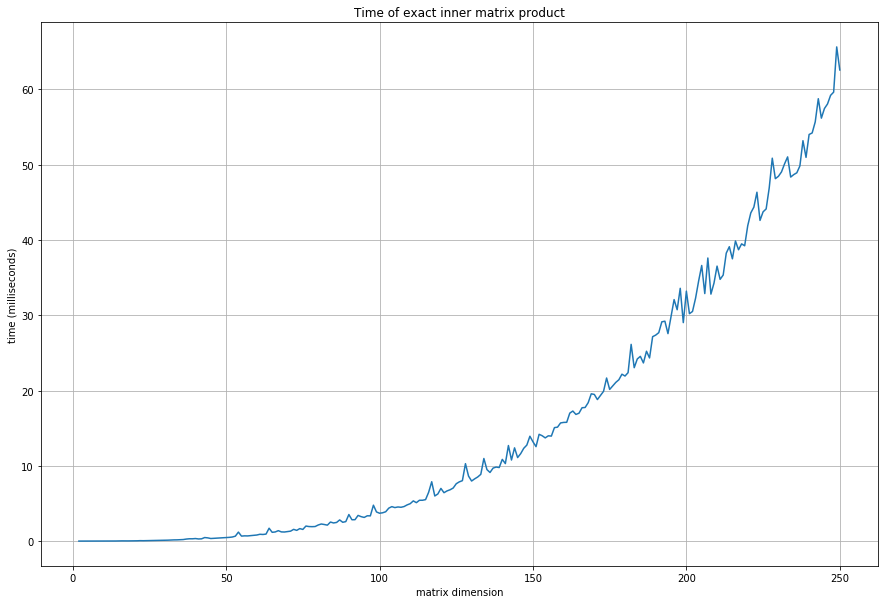

In [239]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(results["matrixDimension"], results["timeInnerExact"])
ax.set(xlabel='matrix dimension', ylabel='time (milliseconds)', title='Time of exact inner matrix product')
ax.grid()
fig.savefig("./images/time_exact_inner_product.png")
plt.show()

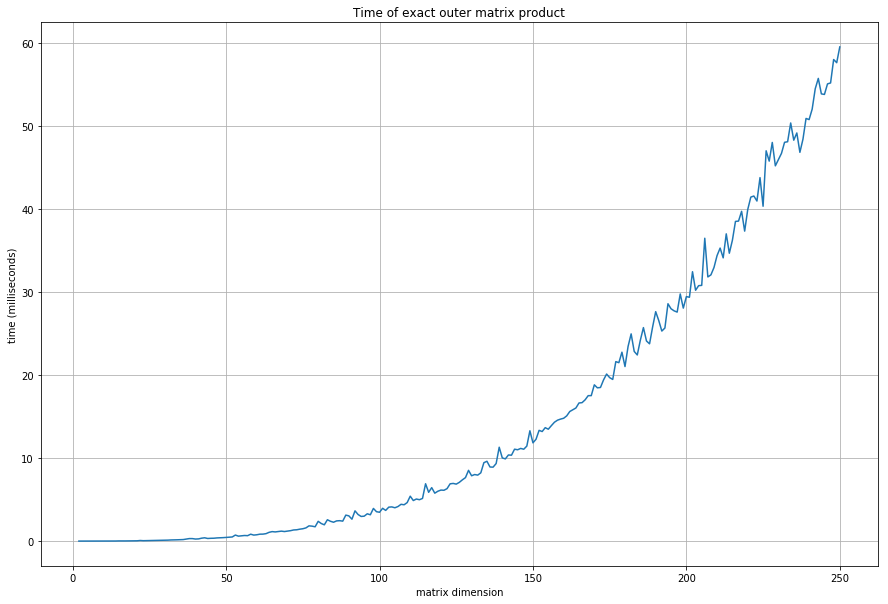

In [240]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(results["matrixDimension"], results["timeOuterExact"])
ax.set(xlabel='matrix dimension', ylabel='time (milliseconds)', title='Time of exact outer matrix product')
ax.grid()
fig.savefig("./images/time_exact_outer_product.png")
plt.show()

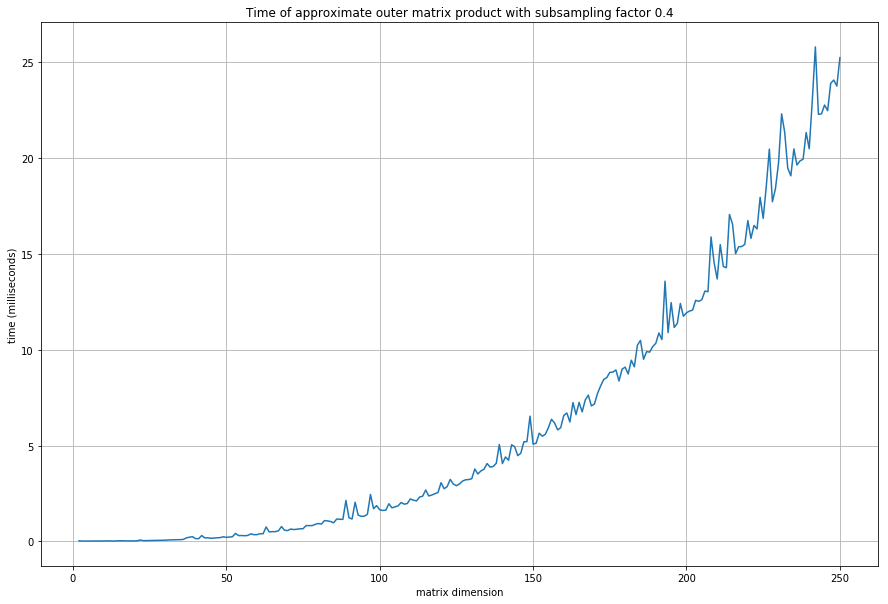

In [241]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(results["matrixDimension"], results["timeOuterApprox"])
ax.set(xlabel='matrix dimension', ylabel='time (milliseconds)', title='Time of approximate outer matrix product with subsampling factor ' + str(subsample))
ax.grid()
fig.savefig("./images/time_approx_outer_product.png")
plt.show()

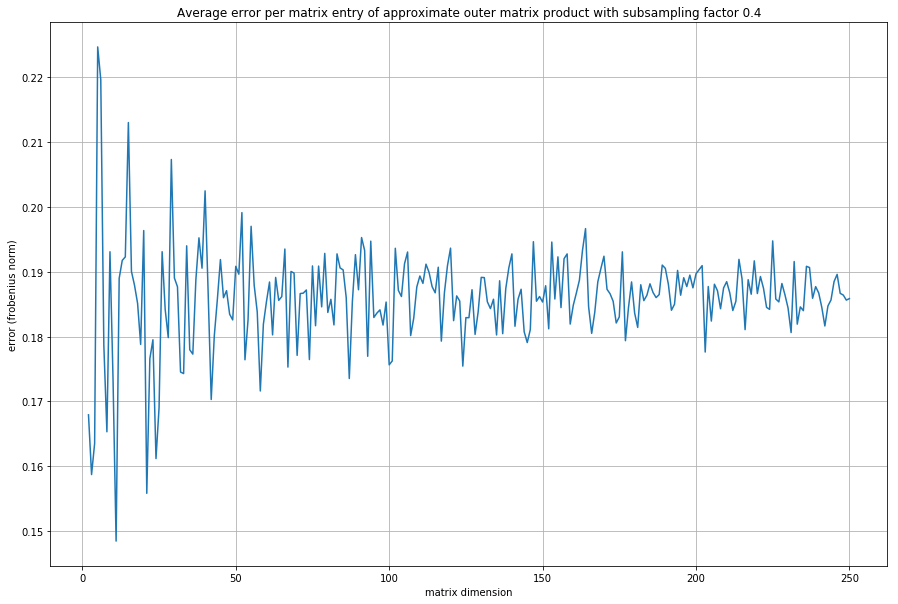

In [245]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(results["matrixDimension"], results["errorOuterApprox"])
ax.set(xlabel='matrix dimension', ylabel='error (frobenius norm)', title='Average error per matrix entry of approximate outer matrix product with subsampling factor ' + str(subsample))
ax.grid()
fig.savefig("./images/error_approx_outer_product.png")
plt.show()

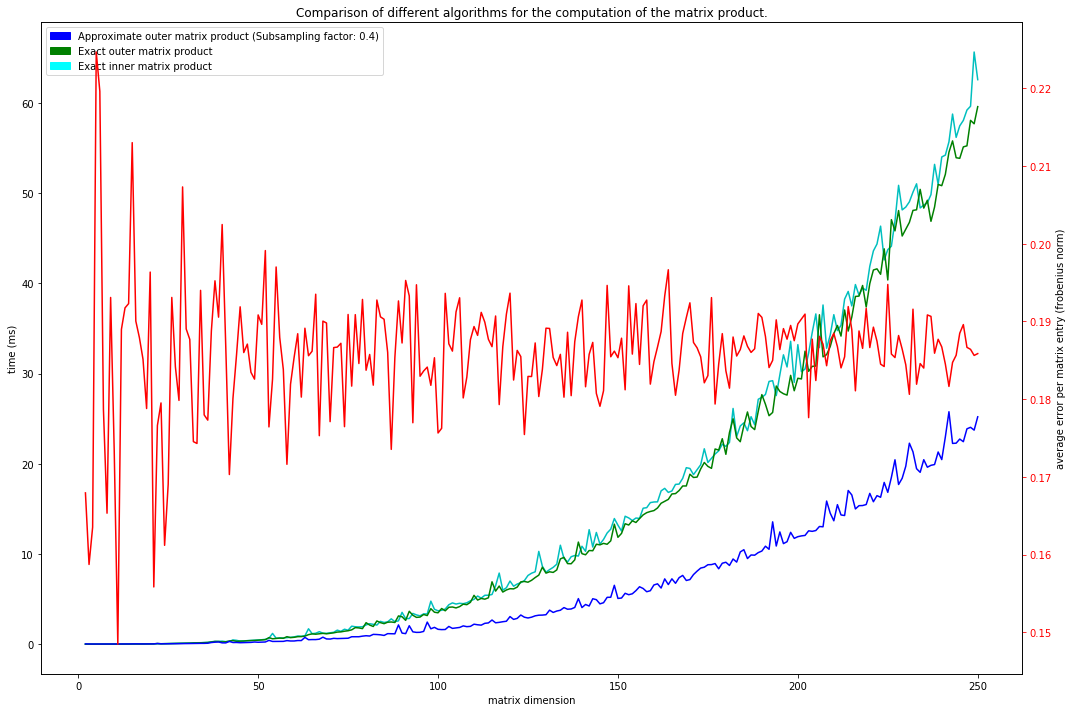

In [246]:
blue_patch = mpatches.Patch(color='blue', label='Approximate outer matrix product (Subsampling factor: ' + str(subsample) + ")")
green_patch = mpatches.Patch(color='green', label='Exact outer matrix product')
cyan_patch = mpatches.Patch(color='cyan', label='Exact inner matrix product')


fig, ax1 = plt.subplots(figsize=(15,10))
plt.legend(handles=[blue_patch, green_patch, cyan_patch])

ax1.plot(results["matrixDimension"], results["timeInnerExact"], 'c')
ax1.plot(results["matrixDimension"], results["timeOuterExact"], 'g')
ax1.plot(results["matrixDimension"], results["timeOuterApprox"], 'b')
ax1.set_xlabel('matrix dimension')
ax1.set_ylabel('time (ms)')
ax1.set(title="Comparison of different algorithms for the computation of the matrix product.")

ax2 = ax1.twinx()
ax2.plot(results["matrixDimension"], results["errorOuterApprox"], 'r-')
ax2.set_ylabel('average error per matrix entry (frobenius norm)')
ax2.tick_params('y', colors='r')

fig.tight_layout()
fig.savefig("./images/all.png")

plt.show()

/Users/Max/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  if __name__ == '__main__':
/Users/Max/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  # Remove the CWD from sys.path while we load stuff.
/Users/Max/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  # This is added back by InteractiveShellApp.init_path()
/Users/Max/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  if sys.path[0] == '':


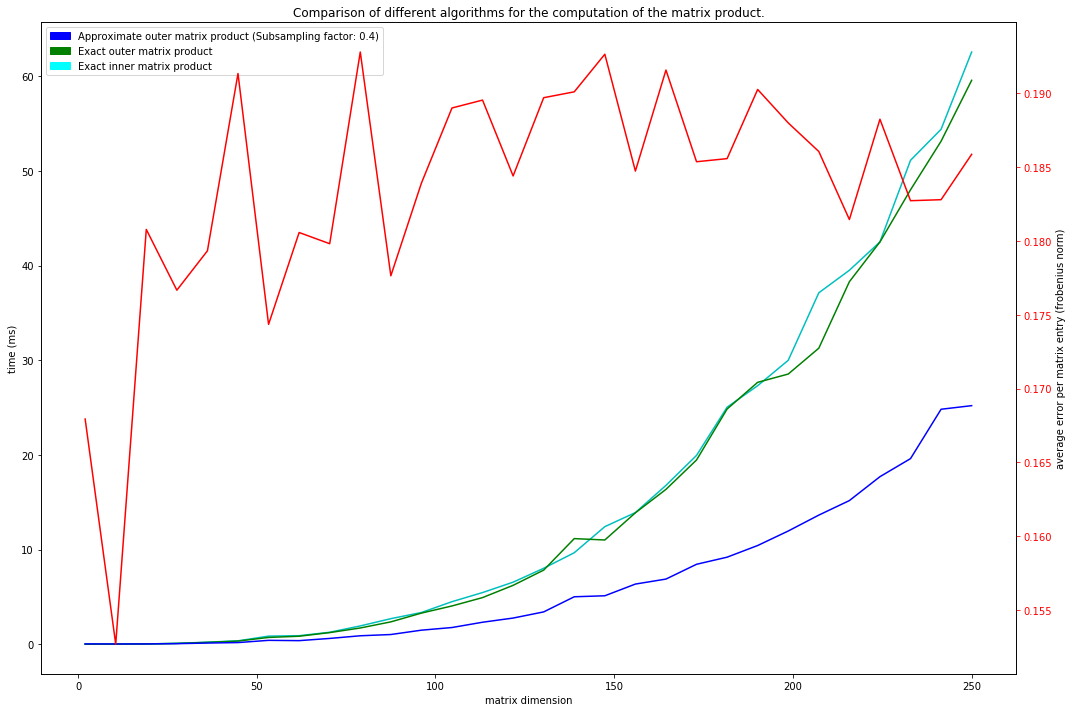

In [248]:
from scipy.interpolate import spline
X_DISCRETIZATION = 30
blue_patch = mpatches.Patch(color='blue', label='Approximate outer matrix product (Subsampling factor: ' + str(subsample) + ")")
green_patch = mpatches.Patch(color='green', label='Exact outer matrix product')
cyan_patch = mpatches.Patch(color='cyan', label='Exact inner matrix product')

yinterp = interp1d(results["matrixDimension"], results["timeInnerExact"], kind='cubic')
x_smooth = np.linspace(results["matrixDimension"].min(), results["matrixDimension"].max(), X_DISCRETIZATION)
y_smooth_timeInnerExact = spline(results["matrixDimension"], results["timeInnerExact"], x_smooth)
y_smooth_timeOuterExact = spline(results["matrixDimension"], results["timeOuterExact"], x_smooth)
y_smooth_timeOuterApprox = spline(results["matrixDimension"], results["timeOuterApprox"], x_smooth)
y_smooth_errorOuterApprox = spline(results["matrixDimension"], results["errorOuterApprox"], x_smooth)

fig, ax1 = plt.subplots(figsize=(15,10))
plt.legend(handles=[blue_patch, green_patch, cyan_patch])

ax1.plot(x_smooth, y_smooth_timeInnerExact, 'c')
ax1.plot(x_smooth, y_smooth_timeOuterExact, 'g')
ax1.plot(x_smooth, y_smooth_timeOuterApprox, 'b')
ax1.set_xlabel('matrix dimension')
ax1.set_ylabel('time (ms)')
ax1.set(title="Comparison of different algorithms for the computation of the matrix product.")

ax2 = ax1.twinx()
ax2.plot(x_smooth, y_smooth_errorOuterApprox, 'r-')
ax2.set_ylabel('average error per matrix entry (frobenius norm)')
ax2.tick_params('y', colors='r')

fig.tight_layout()
fig.savefig("./images/all_smooth.png")

plt.show()